In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Keras Imports
from keras import datasets
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Conv2D, MaxPooling2D

from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


# Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [3]:
# y_train = y_train.reshape(-1,)
# y_test = y_test.reshape(-1,)
# classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(y[index])

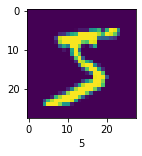

In [5]:
plot_sample(X_train, y_train, 0)

# Normalize training data before training the neural net

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Now build the Sequential Model and add layers into it

In [10]:
def baseline_model():

    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),)
    model.add(MaxPooling2D((2, 2)),)

    model.add(Flatten())
    model.add(Dense(64, activation="relu"))
#     model.add(Dense(32, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [11]:
ml = baseline_model()

In [12]:
ml.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [13]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=5, verbose=1)

In [14]:
estimator.fit(X_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 48s 804us/step - loss: 0.1043 - accuracy: 0.9678
Epoch 2/10
60000/60000 [==============================] - 50s 837us/step - loss: 0.0408 - accuracy: 0.9870
Epoch 3/10
60000/60000 [==============================] - 50s 834us/step - loss: 0.0293 - accuracy: 0.9908
Epoch 4/10
60000/60000 [==============================] - 52s 866us/step - loss: 0.0216 - accuracy: 0.9933
Epoch 5/10
60000/60000 [==============================] - 53s 881us/step - loss: 0.0178 - accuracy: 0.9942
Epoch 6/10
60000/60000 [==============================] - 52s 860us/step - loss: 0.0160 - accuracy: 0.9954
Epoch 7/10
60000/60000 [==============================] - 54s 908us/step - loss: 0.0134 - accuracy: 0.9959
Epoch 8/10
60000/60000 [==============================] - 48s 805us/step - loss: 0.0110 - accuracy: 0.9967
Epoch 9/10
60000/60000 [==============================] - 48s 792us/step - loss: 0.0118 - accuracy: 0.9963
Epoch 10/10
60000/60000 [============

# Evaluation of Model

In [15]:
acc = estimator.score(X_test, y_test)

10000/10000 [==============================] - 2s 244us/step


In [16]:
print('The accuracy is' , round(acc, 3))

The accuracy is 0.989


10000/10000 [==============================] - 2s 215us/step


Text(69.0, 0.5, 'Truth')

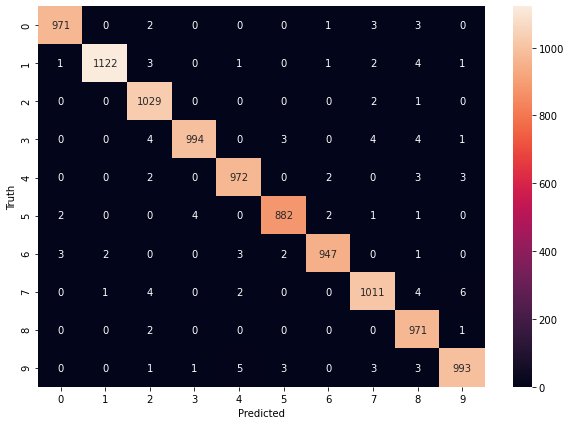

In [17]:
import tensorflow as tf

y_predicted_labels = estimator.predict(X_test)
# y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
from sklearn.metrics import confusion_matrix , classification_report

print("Classification Report: \n", classification_report(y_test, y_predicted_labels))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

